In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# python main.py --model fixed_dose 
name1 = "model=fixed_dose__bin_weekly_dose=3__bound_constant=2.0__num_force=1__num_force_TH=0__R=0.0005__delta=0.1__epsilon=0.14476482730108395__num_trials=20__e_0=0.1__e_scale=1.0__feature_group=0__nan_val_0=False"
name1 = "model=fixed_dose__bin_weekly_dose=3__bound_constant=1.0__num_force=1__num_force_TH=0__R=0.0005__delta=0.1__epsilon=0.14476482730108395__num_trials=20__e_0=0.1__e_scale=1.0__feature_group=0__nan_val_0=False" 

# python main.py --model wcda 
name2 ="model=wcda__bin_weekly_dose=3__bound_constant=1.0__num_force=1__num_force_TH=0__R=0.0005__delta=0.1__epsilon=0.14476482730108395__num_trials=20__e_0=0.1__e_scale=1.0__feature_group=0__nan_val_0=False"
# python main.py --model wpda 
name3 ="model=wpda__bin_weekly_dose=3__bound_constant=1.0__num_force=1__num_force_TH=0__R=0.0005__delta=0.1__epsilon=0.14476482730108395__num_trials=20__e_0=0.1__e_scale=1.0__feature_group=0__nan_val_0=False"

# # python main.py --model fixed_dose --nan_val_0
# name4 ="model=fixed_dose__bin_weekly_dose=3__bound_constant=2.0__num_force=1__num_force_TH=0__R=0.0005__delta=0.1__epsilon=0.14476482730108395__num_trials=20__e_0=0.1__e_scale=1.0__feature_group=0__nan_val_0=True"
# # python main.py --model wcda  --nan_val_0
# name5 ="model=wcda__bin_weekly_dose=3__bound_constant=2.0__num_force=1__num_force_TH=0__R=0.0005__delta=0.1__epsilon=0.14476482730108395__num_trials=20__e_0=0.1__e_scale=1.0__feature_group=0__nan_val_0=True"
# # python main.py --model wpda  --nan_val_0
# name6 ="model=wpda__bin_weekly_dose=3__bound_constant=2.0__num_force=1__num_force_TH=0__R=0.0005__delta=0.1__epsilon=0.14476482730108395__num_trials=20__e_0=0.1__e_scale=1.0__feature_group=0__nan_val_0=True"


# python main.py --model UCBNet --bound_constant 1 --feature_group 0
name7 ="model=UCBNet__bin_weekly_dose=3__bound_constant=1.0__num_force=1__num_force_TH=0__R=0.0005__delta=0.1__epsilon=0.14476482730108395__num_trials=20__e_0=0.1__e_scale=1.0__feature_group=0__nan_val_0=False"
# python main.py --model ThompsonNet --R 0.0005 --feature_group 0
name8 ="model=ThompsonNet__bin_weekly_dose=3__bound_constant=1.0__num_force=1__num_force_TH=0__R=0.0005__delta=0.1__epsilon=0.14476482730108395__num_trials=20__e_0=0.1__e_scale=1.0__feature_group=0__nan_val_0=False"
# python main.py --model eGreedy --e_0 0.1 --e_scale 1.0  --feature_group 0
name9 ="model=eGreedy__bin_weekly_dose=3__bound_constant=1.0__num_force=1__num_force_TH=0__R=0.0005__delta=0.1__epsilon=0.14476482730108395__num_trials=20__e_0=0.1__e_scale=1.0__feature_group=0__nan_val_0=False"

In [3]:
from plot import *

In [4]:
def append_mean_std(inp_data_array, inp_mean_array, inp_std_array):
    inp_mean_array = np.append(inp_mean_array, np.mean(inp_data_array))
    inp_std_array = np.append(inp_std_array, 2.093*np.std(inp_data_array)/float(np.sqrt(20)))
    return inp_mean_array, inp_std_array

In [5]:
def get_model2bin_weekly_dose2metric2statistic2array(model2bin_weekly_dose2data, ix = 2300):
    model2bin_weekly_dose2metric2statistic2array = {}
    for model, bin_weekly_dose2data in model2bin_weekly_dose2data.items():
        print("model: " + str(model))
        bin_weekly_dose_vals = [str(i) for i in np.sort(np.array([int(k) for k in bin_weekly_dose2data.keys()]))]

        for bin_weekly_dose_val in bin_weekly_dose_vals:
            # Initialize arrays
            mean_end_frac_incorrect = np.array([])
            std_end_frac_incorrect = np.array([])
            mean_end_regret_expected = np.array([])
            std_end_regret_expected = np.array([])
            mean_end_regret_observed = np.array([])
            std_end_regret_observed = np.array([])

            # Load data
            data = bin_weekly_dose2data[bin_weekly_dose_val]
            all_a_star_a_hat, all_frac_incorrect, all_frac_correct, all_regret_expected, all_regret_observed = data

            # Get the appropriate metrics
            end_frac_incorrect = all_frac_incorrect[:, ix]
            end_regret_expected = all_regret_expected[:, ix]
            end_regret_observed = all_regret_observed[:, ix]

            # Update mean and standard deviations
            mean_end_frac_incorrect, std_end_frac_incorrect = append_mean_std(end_frac_incorrect, mean_end_frac_incorrect, std_end_frac_incorrect)
            mean_end_regret_expected, std_end_regret_expected = append_mean_std(end_regret_expected, mean_end_regret_expected, std_end_regret_expected)
            mean_end_regret_observed, std_end_regret_observed = append_mean_std(end_regret_observed, mean_end_regret_observed, std_end_regret_observed)

            metric2statistic2array = {"end_frac_incorrect": {"mean": mean_end_frac_incorrect, "std": std_end_frac_incorrect}, "end_regret_expected": {"mean": mean_end_regret_expected, "std": std_end_regret_expected}, "end_regret_observed": {"mean": mean_end_regret_observed, "std": std_end_regret_observed}}
            if model in model2bin_weekly_dose2metric2statistic2array:
                model2bin_weekly_dose2metric2statistic2array[model][bin_weekly_dose_val] = metric2statistic2array
            else:
                model2bin_weekly_dose2metric2statistic2array[model] = {bin_weekly_dose_val: metric2statistic2array}
    return model2bin_weekly_dose2metric2statistic2array

In [6]:
model2bin_weekly_dose2data = get_model2bin_weekly_dose2data("/dfs/scratch1/caruiz/CS234/new/")
for model, name in zip(["fixed_dose", "wcda", "wpda", "UCBNet", "ThompsonNet", "eGreedy"], [name1, name2, name3, name7, name8, name9]):
    model2bin_weekly_dose2data[model]['3'] = load_(name, "data/")

5179
5179
5179
5179
5371
5179
5179
5179
5179
5179
5371
5179
5179
5179
5179
5179
5179
5179
5371
5371
5179
5179
5179
5179
5179
5179
5179
5179
5179
5371
5179
5371
5179
5179
5179
5179
5179
5179
5179
5371
5179
5179
5179
5179
5371
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5371
5179
5179
5179
5371
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5371
5371
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5371
5179
5371
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5179
5371
5179
5371
5179
5179
5371
5371
5179
5179
5179
5371
5371
5179
5179
5179
5179
5179
5179
5179
5179
5371
5179
5179
5179
5179


In [7]:
model2bin_weekly_dose2metric2statistic2array = get_model2bin_weekly_dose2metric2statistic2array(model2bin_weekly_dose2data, ix = 5178)

model: eGreedyD
model: ThompsonNet
model: wcda
model: UCBNet
model: fixed_dose
model: eGreedy
model: ThompsonDNet
model: UCBDNet
model: wpda


In [8]:
def create_y_yerr(bin_weekly_dose2metric2statistic2array, metric):
    y = np.array([])
    y_err = np.array([])
    for x_ in x:
        y = np.append(y, bin_weekly_dose2metric2statistic2array[str(x_)][metric]["mean"])
        y_err = np.append(y_err, bin_weekly_dose2metric2statistic2array[str(x_)][metric]["std"])
    return y, y_err

fixed_dose
[5.19594398e-17 5.19594398e-17 1.03918880e-16 1.03918880e-16]
wcda
[0.00048011 0.00049121 0.00054586 0.00054228]
wpda
[1.29898600e-17 2.59797199e-17 0.00000000e+00 0.00000000e+00]
UCBNet
[0.00087869 0.00188006 0.00317063 0.00279513]
ThompsonNet
[0.00137927 0.00170683 0.00615406 0.00335094]
eGreedy
[0.0013895  0.04303808 0.00783965 0.01755714]


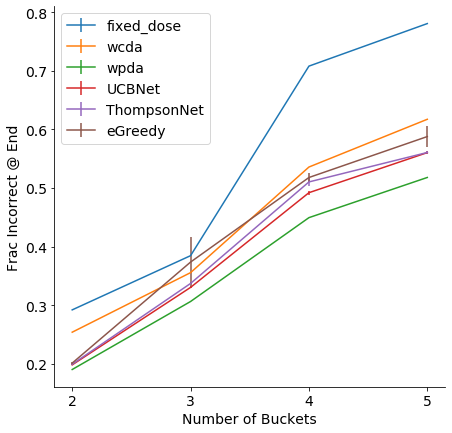

fixed_dose
[0. 0. 0. 0.]
wcda
[2.48651131 2.54398532 2.8270031  2.80844415]
wpda
[0. 0. 0. 0.]
UCBNet
[ 4.550711    9.73683756 16.4207155  14.47599283]
ThompsonNet
[ 7.14323453  8.83967344 31.87188726 17.35453897]
eGreedy
[  7.19620001 222.89420181  40.60152972  90.92843325]


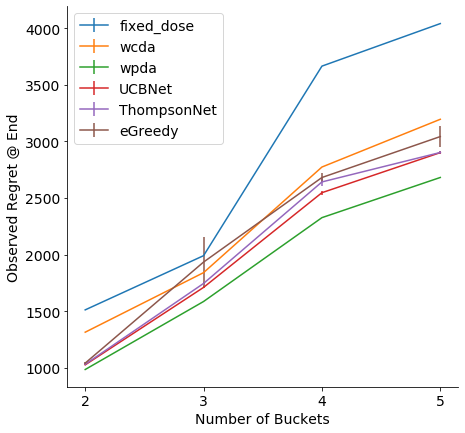

fixed_dose
[1.40141227e-13 7.29772802e-14 4.64910053e-13 9.31948888e-13]
wcda
[0.1292899  0.18617141 0.22453104 0.23064949]
wpda
[3.89938201e-15 1.89285323e-14 2.85675249e-14 1.14579356e-13]
UCBNet
[1.52189026 3.834584   5.22194832 6.15371388]
ThompsonNet
[ 3.18970518  4.91776437 10.6328146  14.5320663 ]
eGreedy
[  4.33926824 204.87204922  37.91841618  71.88397651]


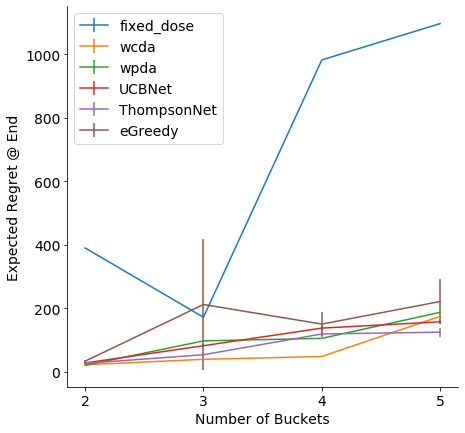

In [11]:
%matplotlib inline

fontsize = 14
for metric in ["end_frac_incorrect", "end_regret_observed", "end_regret_expected"]:
    fig = plt.figure(figsize=(7, 7))
    names = []
    for model in ["fixed_dose", "wcda", "wpda", "UCBNet", "ThompsonNet", "eGreedy"]:
        bin_weekly_dose2metric2statistic2array = model2bin_weekly_dose2metric2statistic2array[model]
        if not(model in ["UCBDNet", "eGreedyD", "ThompsonDNet"]):
            x = np.sort([int(i) for i in bin_weekly_dose2metric2statistic2array.keys() if not(i == "1")])
            y, y_err = create_y_yerr(bin_weekly_dose2metric2statistic2array, metric)
            names.append(model)
            print(model)
            print(y_err)
            plt.errorbar(x, y, y_err)

    # Title, Axes, Tick Marks, Legend
    plt.xlabel("Number of Buckets", fontsize = fontsize)
    y_label_mapping = {"end_frac_incorrect": "Frac Incorrect @ End", "end_regret_observed": "Observed Regret @ End", "end_regret_expected": "Expected Regret @ End"}
    plt.ylabel(y_label_mapping[metric], fontsize = fontsize)
    plt.tick_params(axis='both', which='major', labelsize=fontsize)
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)
    plt.legend(names, fontsize = fontsize)

    # Despine, Add Minor Tick Marks
    ax = plt.gca()
    sns.despine(right = True, top = True)
    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
    plt.savefig(metric + ".pdf", bbox_inches = "tight")
    plt.show()

In [20]:
model2bin_weekly_dose2metric2statistic2array["wpda"]['3']

{'end_frac_incorrect': {'mean': array([0.30623673]),
  'std': array([2.59797199e-17])},
 'end_regret_expected': {'mean': array([96.80859949]),
  'std': array([1.89285323e-14])},
 'end_regret_observed': {'mean': array([1586.]), 'std': array([0.])}}